EDA with Iris dataset

1.  Usar la librería pandas para cargar el archivo csv y convertirlo en un dataframe que podemos recorrer.
requiere python3 -m pip install pandas

Vamos a comprobar que leemos el archivo y qué contiene

In [10]:
import pandas as pd 

#leer el csv a un dataframe
df = pd.read_csv("data/Iris.csv")

#con head() vemos las 5 primeras filas de los datos leidos
thdf_head = df.head()
print("Ver las primeras líneas del archivo")
print(thdf_head)
print("\n")

#shape nos indica el número de columnas y filas
thdf_shape = df.shape
print("N filas y columnas")
print(thdf_shape)
print("\n")

#info() nos indica el tipo de datos
print("Info datos")
df.info()
print("\n")


Ver las primeras líneas del archivo
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


N filas y columnas
(150, 6)


Info datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dty

2. Con describe() del dataframes se puede obtener un breve resumen estadístico de los datos: contaje de datos, media, desviación estándar, mínimo y máximo

In [13]:
print("Estadística rápida de datos")
thdf_describe = df.describe()
print(thdf_describe)
print("\n")

Estadística rápida de datos
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000




3. Limpieza de datos: comprobar valores que faltan

si se encuentran valores que falta se pueden rellenar con valores por defecto específicos con fillna("valor pro defecto"), también se pueden filtrar sólo los valores no nulos por columna con notnull(df["nombre columna"])

In [15]:
#isnull()
print("Limpieza de datos: buscar datos que faltan")
thdf_isnull = df.isnull().sum()
print(thdf_isnull)
print("\n")

Limpieza de datos: buscar datos que faltan
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64




4. Limpieza de datos: limpiar duplicados y comprobar si el conjunto de datos está equilibrado (en caso de que nos importe)

Los duplicados no son "malos", de hecho son necesarios en muchos casos para hacer estadística!!!

In [16]:
#duplicados para una columna drop_duplicates(subset = "nombre columna",)
print("Limpieza de datos: duplicados - ver los valores únicos")
thdf_valunicos = df.drop_duplicates(subset = "Species",)
print(thdf_valunicos)
print("\n")

#value_counts()
print("Limpieza de datos: equilibrados")
thdf_valcounts = df.value_counts("Species")
print(thdf_valcounts)
print("\n")

Limpieza de datos: duplicados - ver los valores únicos
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
50    51            7.0           3.2            4.7           1.4   
100  101            6.3           3.3            6.0           2.5   

             Species  
0        Iris-setosa  
50   Iris-versicolor  
100   Iris-virginica  


Limpieza de datos: equilibrados
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64




5. Visualizar datos con Matplotlib y Seaborn

Vamos a trabajar los datos según la especie

In [ ]:
import matplotlib 
matplotlib.__version__

'3.10.1'

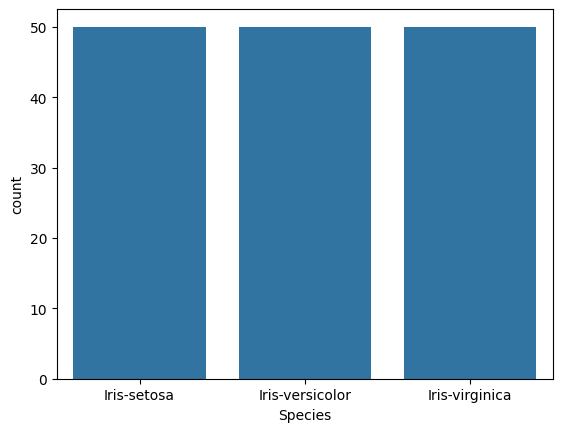

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt 

#gráfico con el número de filas de datos por especie
sns.countplot(x="Species", data=df,)
plt.show()


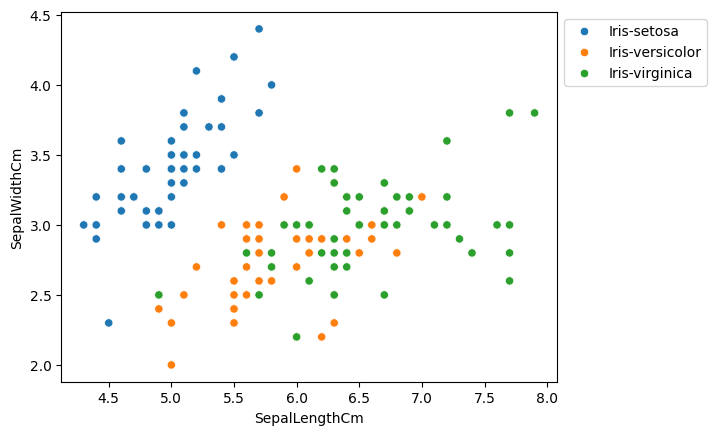

In [ ]:
#Comparación entre dos variables, agrupando por especies 
#STD......Conclusiones?
#STD......Hacer el mismo tipo de gráfico para las dimensiones de los pétalos

sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df,)
plt.legend(bbox_to_anchor=(1, 1), loc=2) #poner la leyenda fuera
plt.show()

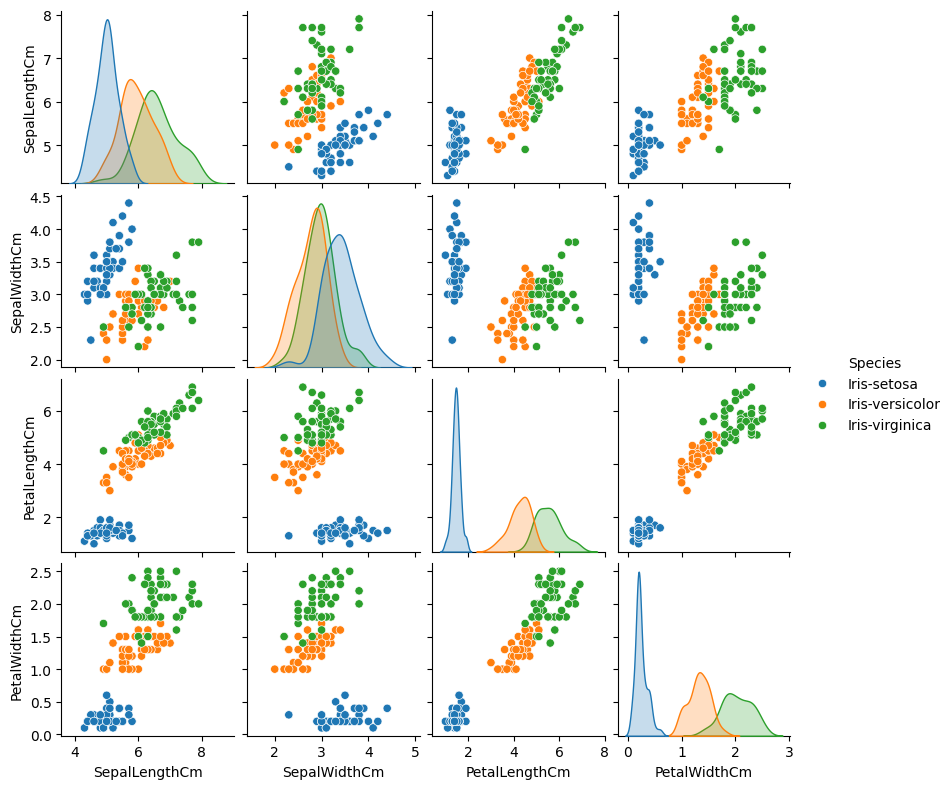

In [ ]:
#Hacer un diagrama de pares para graficar todas las relaciones entre las columnas, por especies
#STD......Conclusiones?
sns.pairplot(df.drop(['Id'], axis = 1), hue='Species', height=2)

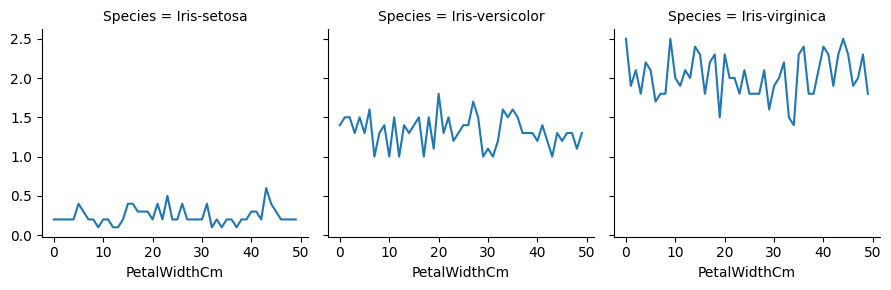

In [26]:
#Cuando identificamos una variable de interés en el gráfico de pares (pairgrid), o porque nos interesaba previamente, podemos usar FacetGrid para mostrar varios gráficos con la misma comparativa para cada especie
# Ejemplo: ancho de los pétalos
plot = sns.FacetGrid(data=df, col="Species")
plot.map(plt.plot,"PetalWidthCm")
plt.show()

ESTADÍSTICA & Gráficos

c:\phyton\FundProgII\08_CienciaDatos\.venv\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\phyton\FundProgII\08_CienciaDatos\.venv\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kw

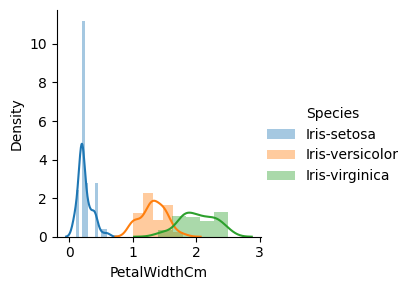

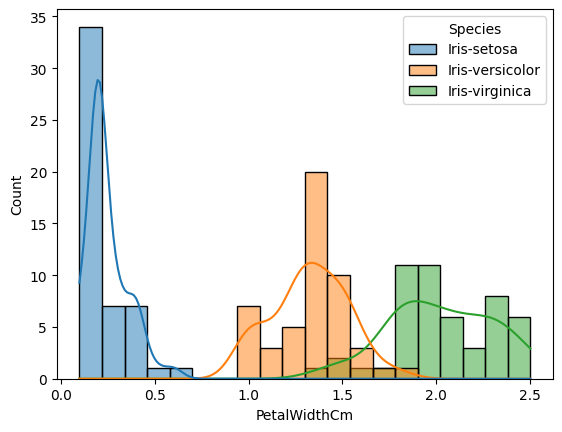

In [40]:
#También podemos usar FacetGrid para mostrarlo como un gráfico de distribución tipo histograma
plot = sns.FacetGrid(data=df, hue="Species") #cambiar hue por col para separar
#Aun funciona, deprecated
plot.map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()
#Reemplazar el deprecado 
#OPCIONALES_ kde: kernel density error, bins: contenedores a mostrar en el histograma para agrupar o dividir
plot2 = sns.histplot(data=df,hue="Species",x="PetalWidthCm",kde=True, bins=20)
plt.show()
#plot3 = sns.displot(data=df,hue="Species",x="PetalWidthCm")
#plt.show()

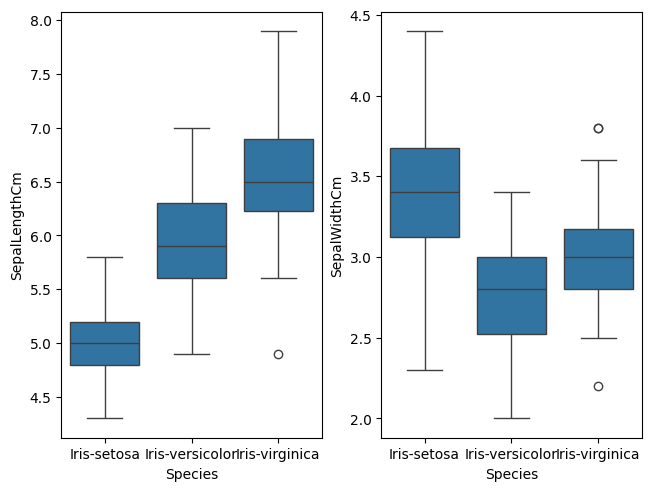

In [47]:
#Diagramas de caja para ver la distribución de valores y determinar si hay valores atípicos
#Vamos a definir varios gráficos que vamos a pintar con subplot 
# subplot(nrows, ncols, index, **kwargs)

def grafico(y):
    sns.boxplot(x="Species", y=y, data=df)

plt.figure(layout="constrained")
plt.subplot(121)
grafico("SepalLengthCm")
plt.subplot(122)
grafico("SepalWidthCm")
plt.show()


<Axes: xlabel='SepalWidthCm'>

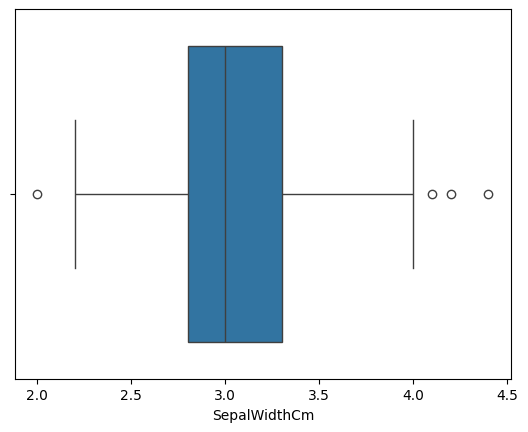

In [48]:
#Vamos a profundizar en los datos de anchura de los pétalos para buscar valores atípicos
sns.boxplot(x="SepalWidthCm", data=df)

Datos conformado inicial  (150, 6)
IQR  0.5
Q1  2.8
Q3  3.3
(array([60]),)
(array([15, 32, 33]),)
Datos conformado final  (146, 6)


<Axes: xlabel='SepalWidthCm'>

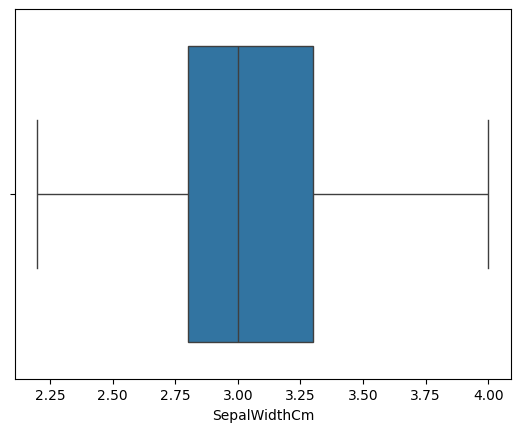

In [ ]:
#Eliminar valores atípicos: vamos a usar NumPy y el rango entre cuartiles (Interquartile Range, IQR) que indica dónde se encuentran la mayoría de los datos, es decir, da la tendencia central de los datos (es una medida de dispersión)
#https://es.statisticseasily.com/glosario/what-is-inter-quartile-range-iqr/

import numpy as np 

#voy a limpiar sobre una copia de los datos
dfc = pd.read_csv('data/Iris.csv')

#IQR
Q1 = np.percentile(dfc["SepalWidthCm"],25,method="midpoint")
Q3 = np.percentile(dfc["SepalWidthCm"],75,method="midpoint")
#Otra forma de calcularlos desde dataframes
#Q1 = dfc["SepalWidthCm"].quantile(0.25)
#Q3 = dfc["SepalWidthCm"].quantile(0.75)
IQR = Q3 - Q1

print("Datos conformado inicial ", dfc.shape)
print("IQR ", IQR)
print("Q1 ", Q1)
print("Q3 ", Q3)
#print(dfc['SepalWidthCm'])

#Calcular límites y borrar outgroups
lim_inf = np.where(dfc["SepalWidthCm"] <= (Q1 - 1.5*IQR))
lim_sup = np.where(dfc["SepalWidthCm"] >= (Q3 + 1.5*IQR))
print(lim_inf)
print(lim_sup)
dfc.drop(lim_inf[0], inplace=True)
dfc.drop(lim_sup[0], inplace=True)

print("Datos conformado final ", dfc.shape)

sns.boxplot(x="SepalWidthCm", data=dfc)


Correlación y Mapas de calor

In [68]:
#pandas permite calcular la correlación por pares, ignorando los valores no numéricos
#https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson
#https://www.probabilidadyestadistica.net/coeficiente-de-correlacion-de-pearson/

dfc = pd.read_csv('data/Iris.csv')
dfc.select_dtypes(include=["number"]).corr(method="pearson")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<Axes: >

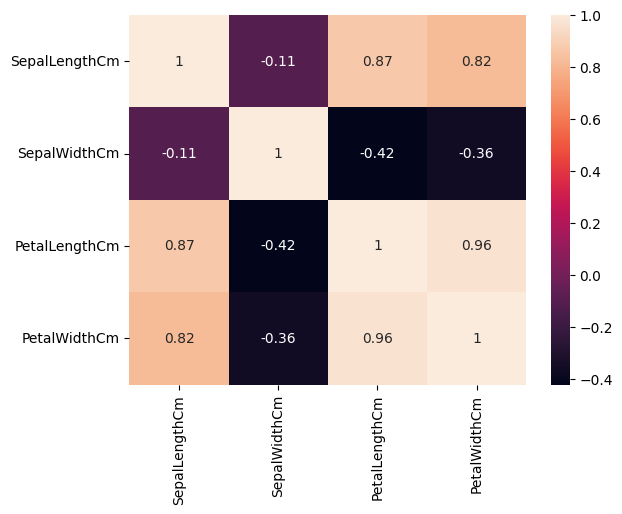

In [75]:
#Hacer un mapa de calor con los datos de correlación, eliminando la columna id.
#sns.color_palette("mako", as_cmap=True) #add param cmap="mako"
sns.heatmap(dfc.select_dtypes(include=["number"]).corr(method="pearson").drop(["Id"],axis=1).drop(["Id"], axis=0), annot=True)
